# Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,calinski_harabasz_score,adjusted_rand_score
import pickle


# Importing Dataset

In [4]:
data = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Exploration and Analysis

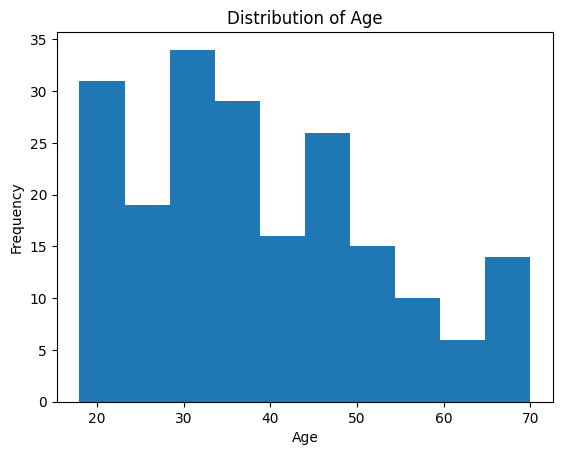

In [6]:
#Plotting the distribution of Age
plt.hist(data["Age"])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age");

## Observation:
1. The most populous age group is between 30 and 40 years, with a frequency slightly above 30.
2. The distribution shows a generally decreasing trend as age increases
3. There are two noticeable peaks, one in the 20-30 range and another in the 30-40 range, indicating higher frequencies in these age groups.
4. The distribution appears to be negatively skewed, as there are more individuals in the younger age groups (20-40) compared to the older age groups (50-70).

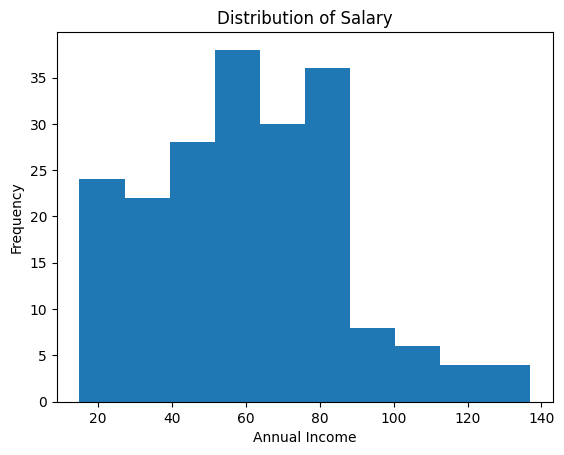

In [7]:
#Distribution of Salary
plt.hist(data["Annual Income (k$)"])
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.title("Distribution of Salary");

## Observations
1. The most frequent annual income range is between 50,000 and 70,000, with the highest frequency slightly above 35
2. The distribution shows a unimodal pattern with a peak in the middle range (50,000 to 70,000).
3. The distribution appears to be positively skewed, as there are more individuals with lower to middle incomes compared to those with higher incomes.
4. The frequencies for incomes above 100,000 are quite low, suggesting that high-income earners are a smaller segment of the dataset.


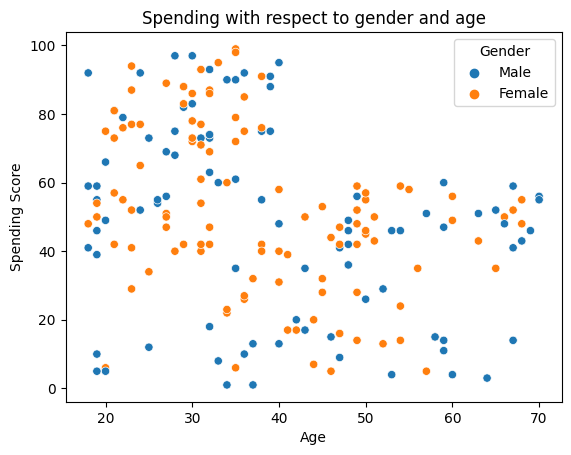

In [8]:
#Plotting Age vs Spending
sns.scatterplot(x= data["Age"],y= data["Spending Score (1-100)"],hue = data["Gender"])
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Spending with respect to gender and age");

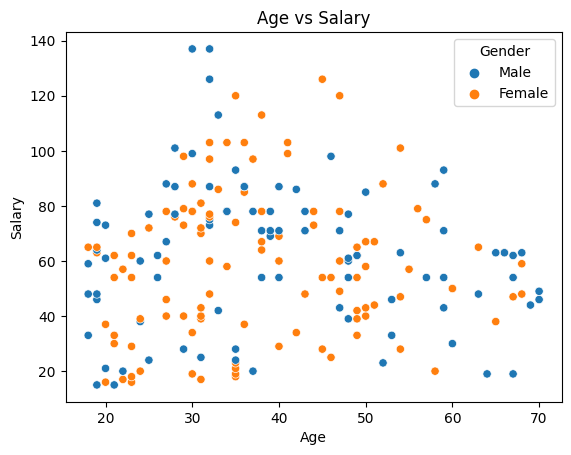

In [9]:
#Age vs Salary
sns.scatterplot(x = data["Age"],y = data["Annual Income (k$)"],hue = data["Gender"])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary");

<Axes: >

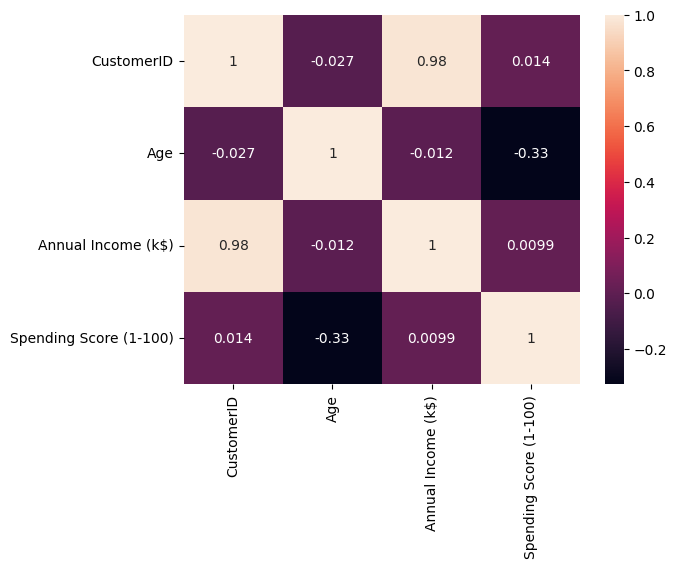

In [10]:
##selecting the variables
sns.heatmap(data.drop("Gender",axis = 1).corr(),annot = True)

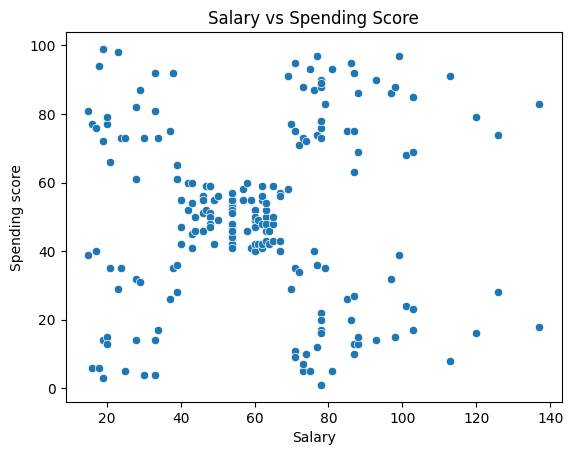

In [11]:
##Salary vs Spending Score
sns.scatterplot(x = data["Annual Income (k$)"],y = data["Spending Score (1-100)"])
plt.xlabel("Salary")
plt.ylabel("Spending score")
plt.title("Salary vs Spending Score");

## Observation
1. We can see some patterns/clusters forming between spending score and salary. We can take only these variables for the clustering

Text(0.5, 1.0, 'Avg Spending made by male and female')

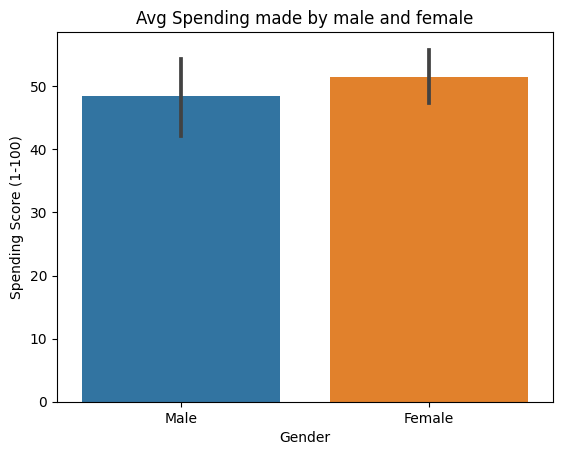

In [12]:
#calculating avg spending made by male and female
avg_spending = data.groupby("Gender")["Spending Score (1-100)"].mean().reset_index()
sns.barplot(avg_spending,x = data["Gender"],y = data["Spending Score (1-100)"])
plt.title("Avg Spending made by male and female")


## Observation: 
1. Both male and female customers were got an avg spending score of about 50, this means that there are no differences in their purchasing behaviour.
2. So this feature may not needed for segmentation

# Feature Selection

In [12]:
##We can see some clusters forming here
#so we take these variables for clustering
data = data[["Annual Income (k$)","Spending Score (1-100)"]]

In [13]:
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Feature Scaling

In [14]:
##standardizing the data
sc = StandardScaler()
data_scaled = sc.fit_transform(data)

# Finding Optimal Clusters using Silhoutte Scores

The optimal number of clusters at which the silhoutte score is maximum is 3


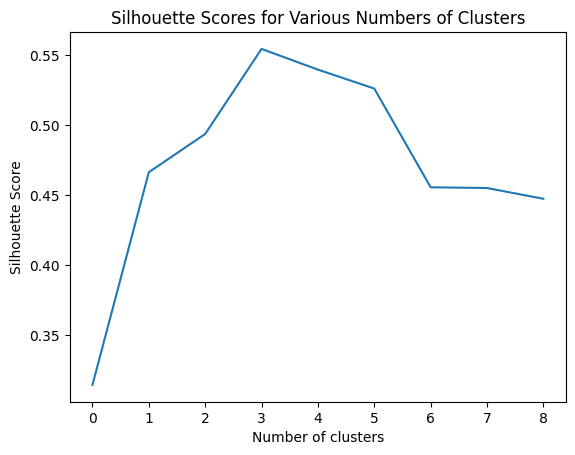

In [15]:
si_scores = []
for i in range(2,11):
    kmeans = KMeans(n_clusters = i,init = "k-means++",n_init = 10,max_iter=300,random_state = 42)
    clusters = kmeans.fit_predict(data_scaled)
    si_score = silhouette_score(data_scaled,clusters)
    si_scores.append(si_score)

plt.plot(si_scores)
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

print("The optimal number of clusters at which the silhoutte score is maximum is" ,si_scores.index(max(si_scores)))

# Fitting K means model with 3 clusters

In [16]:
kmeans = KMeans(n_clusters = 3,init = "k-means++",n_init = 10,max_iter = 300,random_state = 42)
clusters = kmeans.fit_predict(data_scaled)
data["Clusters"] = clusters


# Plotting the clusters

Text(0.5, 1.0, 'Clusters based on Annual Income and Spending Score')

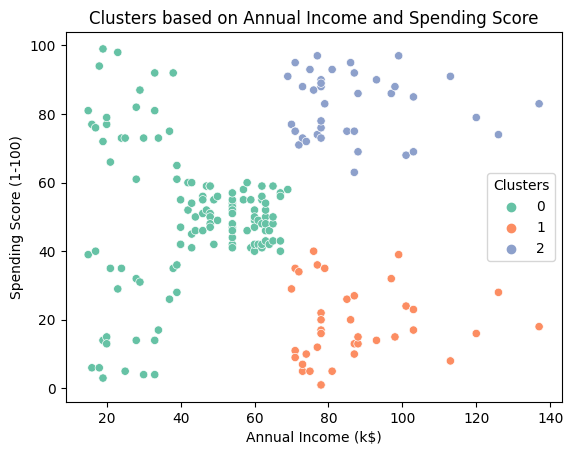

In [17]:
sns.scatterplot(x = data["Annual Income (k$)"],y = data["Spending Score (1-100)"],hue = data["Clusters"],palette="Set2")
plt.title("Clusters based on Annual Income and Spending Score")

## Observation:

**Cluster 0 (Green):**
Annual Income: Ranges from about 20k to 60k.
Spending Score: Ranges widely from 20 to 100.
This cluster includes individuals with ***lower to middle incomes***, showing a ***diverse range of spending*** scores. Some spend a lot while others spend minimally.

**Cluster 1 (Orange):**
Annual Income: Ranges from about 70k to 140k.
Spending Score: Mostly between 0 and 40.
This cluster consists of ***high-income individuals*** who have relatively low spending scores, indicating ***they may be conservative spenders or save more.***

**Cluster 2 (Blue):**
Annual Income: Ranges from about 70k to 100k.
Spending Score: Mostly between 60 and 100.
This cluster includes individuals with ***high incomes*** who also have ***high spending scores***, suggesting they are big spenders.

We need to focus more on Category 1 as the individuals who fall under this category have more income. We can improvise and personalize our advertising to sell them. Also Providing discount offers and coupons to category 0 will increase the purchase habits of youngsters thereby increasing profits

# Evaluating the clusters based on the metrics

In [18]:
print("WCSS Score: ",kmeans.inertia_)
print("Silhoutte Score: ",silhouette_score(data_scaled,clusters))
print("Davies Boulding Score: ",davies_bouldin_score(data_scaled,clusters))
print("Calinski harabasz score: ",calinski_harabasz_score(data_scaled,clusters))


WCSS Score:  157.70400815035947
Silhoutte Score:  0.46658474419000145
Davies Boulding Score:  0.716482156943549
Calinski harabasz score:  151.33512126359477


# Fitting another K-means model with 5 clusters

In [19]:
kmeans_5 = KMeans(n_clusters =5,init = "k-means++",n_init = 10,max_iter = 300,random_state = 42)
clusters = kmeans_5.fit_predict(data_scaled)
data["Clusters_5"] = clusters


Text(0.5, 1.0, 'Clusters based on Annual Income and Spending Score')

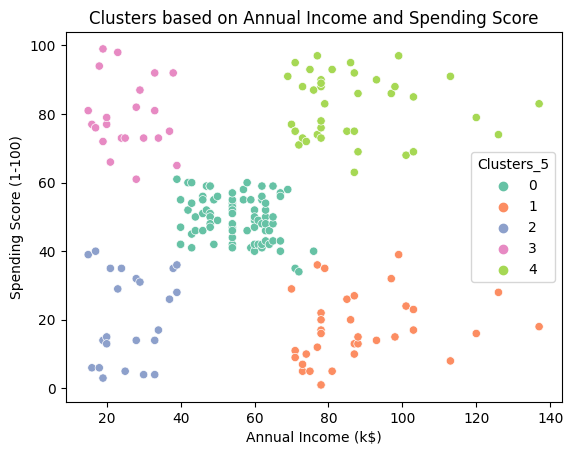

In [20]:
sns.scatterplot(x = data["Annual Income (k$)"],y = data["Spending Score (1-100)"],hue = data["Clusters_5"],palette="Set2")
plt.title("Clusters based on Annual Income and Spending Score")

In [21]:
#Metrics for clustering
print("WCSS Score: ",kmeans_5.inertia_)
print("Silhoutte Score: ",silhouette_score(data_scaled,clusters))
print("Davies Boulding Score: ",davies_bouldin_score(data_scaled,clusters))
print("Calinski harabasz score: ",calinski_harabasz_score(data_scaled,clusters))


WCSS Score:  65.56840815571681
Silhoutte Score:  0.5546571631111091
Davies Boulding Score:  0.5722356162263352
Calinski harabasz score:  248.64932001536357


## Observation:

1. As we increased no of clusters to 5 the WCSS score decreased which indicates clusters are tighter and more compact
2. Silhouette Score  indicates that  clusters are reasonably well-separated. This score is above 0, suggesting acceptable clustering structure.
3. Davies-Bouldin score is reduced indicating a reasonable separation between clusters. Lower scores closer to 0 indicate better-defined clusters
4. Calinski-Harabasz score is increased suggesting a good ratio of between-cluster to within-cluster dispersion. Higher values indicate well-separated clusters


# Predicting for unknown data


In [42]:
def preprocess(salary,spending):
    data = pd.DataFrame({
        "Annual Income (k$)": [salary],
        "Spending Score (1-100)": [spending]
    })
    data_scaled = sc.transform(data)
    return data_scaled
salary = 115
spending = 25
data_scaled = preprocess(salary,spending)
cluster = kmeans_5.predict(data_scaled)
print(cluster[0])

1


In [37]:
data

,Annual Income (k$),Spending Score (1-100),Clusters,Clusters_5
0,15,39,0,2
1,15,81,0,3
2,16,6,0,2
3,16,77,0,3
4,17,40,0,2
...,...,...,...,...
195,120,79,2,4
196,126,28,1,1
197,126,74,2,4
198,137,18,1,1


# Saving the Standard Scaler and K means model

In [85]:
##Saving the best model
with open("kmeans_model.pkl","wb") as file:
    pickle.dump(kmeans_5,file)
with open("scaler.pkl","wb") as file:
    pickle.dump(sc,file)


# fitting Kmeans Clustering Model with all input variables

In [21]:
data = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [23]:
data = data.drop("CustomerID",axis = 1)

In [25]:
sc = StandardScaler()
data[["Age","Annual Income (k$)","Spending Score (1-100)"]] = sc.fit_transform(data[["Age","Annual Income (k$)","Spending Score (1-100)"]])

In [26]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.424569,-1.738999,-0.434801
1,1,-1.281035,-1.738999,1.195704
2,0,-1.352802,-1.700830,-1.715913
3,0,-1.137502,-1.700830,1.040418
4,0,-0.563369,-1.662660,-0.395980


The optimal number of clusters at which the silhoutte score is maximum is 4


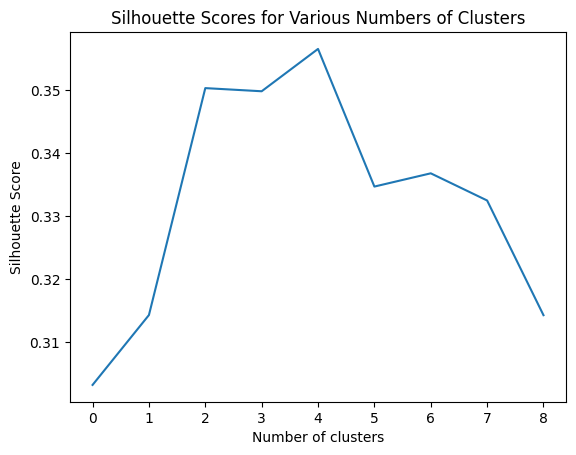

In [27]:
si_scores = []
for i in range(2,11):
    kmeans = KMeans(n_clusters = i,init = "k-means++",n_init = 10,max_iter=300,random_state = 42)
    clusters = kmeans.fit_predict(data)
    si_score = silhouette_score(data,clusters)
    si_scores.append(si_score)

plt.plot(si_scores)
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

print("The optimal number of clusters at which the silhoutte score is maximum is" ,si_scores.index(max(si_scores)))

In [28]:
kmeans_4 = KMeans(n_clusters=4,init = "k-means++",n_init=10,max_iter=300,random_state = 42)
clusters = kmeans_4.fit_predict(data)


In [29]:
#Metrics for clustering
print("WCSS Score: ",kmeans_4.inertia_)
print("Silhoutte Score: ",silhouette_score(data,clusters))
print("Davies Boulding Score: ",davies_bouldin_score(data,clusters))
print("Calinski harabasz score: ",calinski_harabasz_score(data,clusters))


WCSS Score:  254.28290726083475
Silhoutte Score:  0.35027020434653977
Davies Boulding Score:  1.0650090503369551
Calinski harabasz score:  101.48726473051549


## Observation:
1. As the metrics scores are not good enough we can say this is not a good segmentation model.